In [1]:
import numpy as np
import pandas as pd

In [2]:
players = pd.read_csv('dataset/players_22.csv')

/var/folders/b0/2gd4pmxn5g793y37y_qkjqkr0000gn/T/ipykernel_2310/4288408041.py:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  players = pd.read_csv('dataset/players_22.csv')


In [3]:
players.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [4]:
players.shape

(19239, 110)

In [9]:
players.isna().sum()

sofifa_id               0
player_url              0
short_name              0
long_name               0
player_positions        0
                    ...  
player_face_url         0
club_logo_url          61
club_flag_url          61
nation_logo_url     18480
nation_flag_url         0
Length: 110, dtype: int64

In [10]:
features = ['overall', 'potential', 'value_eur', 'wage_eur', 'age']

In [11]:
players = players.dropna(subset=features)

In [12]:
data = players[features].copy()

In [28]:
data

,overall,potential,value_eur,wage_eur,age
0,10.000000,9.608696,4.618307,9.227468,7.000000
1,9.804348,9.413043,6.543654,7.939914,6.333333
2,9.608696,9.217391,3.087308,7.939914,7.666667
3,9.608696,9.217391,6.984396,7.939914,5.333333
4,9.608696,9.217391,6.822018,10.000000,5.666667
...,...,...,...,...,...
19234,1.000000,1.586957,1.002830,1.012876,3.000000
19235,1.000000,2.956522,1.004686,1.000000,2.000000
19236,1.000000,2.173913,1.004222,1.000000,2.666667
19237,1.000000,3.152174,1.004686,1.000000,2.000000


1. Scale the data
2. Initialize random centroids
3. Label each data point
4. Update centroids
5. Repeat step 3 and 4 until centroids stop changing

In [14]:
# scale the data --> min-max scaling. range 1-10 scale
data = ((data - data.min()) / (data.max() - data.min())) * 9 + 1

In [15]:
data.describe()

,overall,potential,value_eur,wage_eur,age
count,19165.000000,19165.000000,19165.000000,19165.000000,19165.000000
mean,4.670472,5.319998,1.131826,1.219443,4.063345
std,1.346635,1.191076,0.353229,0.501528,1.575838
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.739130,4.521739,1.021620,1.012876,2.666667
50%,4.717391,5.304348,1.044817,1.064378,4.000000
75%,5.500000,6.086957,1.092370,1.193133,5.333333
max,10.000000,10.000000,10.000000,10.000000,10.000000


In [16]:
data.head()

,overall,potential,value_eur,wage_eur,age
0,10.000000,9.608696,4.618307,9.227468,7.000000
1,9.804348,9.413043,6.543654,7.939914,6.333333
2,9.608696,9.217391,3.087308,7.939914,7.666667
3,9.608696,9.217391,6.984396,7.939914,5.333333
4,9.608696,9.217391,6.822018,10.000000,5.666667


In [21]:
def random_centroid(data, k):
    centroids = []
    for _ in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [22]:
centroids = random_centroid(data, 5)

In [23]:
centroids

,0,1,2,3,4
overall,3.739130,3.543478,3.934783,3.739130,4.717391
potential,3.347826,6.282609,3.347826,7.260870,5.500000
value_eur,1.036698,1.370734,1.324340,1.059895,1.014660
wage_eur,1.244635,1.502146,1.090129,1.347639,1.347639
age,5.000000,4.666667,5.333333,2.000000,5.333333


In [25]:
# calculating euclidean distance between the data and centroids
# formula: d(p,q) = sqrt(sum[i=1, n]((qi-pi)^2))
np.sqrt(((data - centroids.iloc[:, 0])**2).sum(axis=1))

0        12.607558
1        12.268041
2        11.182418
3        12.215424
4        13.396805
           ...    
19234     3.828623
19235     4.088621
19236     3.792921
19237     4.074554
19238     4.074554
Length: 19165, dtype: float64

In [26]:
distances = centroids.apply(lambda x: np.sqrt(((data - x)**2).sum(axis=1)))

In [27]:
distances

,0,1,2,3,4
0,12.607558,11.332312,12.483174,12.019350,11.074433
1,12.268041,10.953532,12.099564,11.564004,10.780394
2,11.182418,9.939381,11.050663,10.860910,9.536365
3,12.215424,10.899648,12.066519,11.311441,10.809241
4,13.396805,12.179073,13.280304,12.640792,12.101393
...,...,...,...,...,...
19234,3.828623,5.627695,4.155405,6.388384,5.889614
19235,4.088621,5.002938,4.470736,5.114113,5.614298
19236,3.792921,5.266606,4.148823,5.826522,5.666915
19237,4.074554,4.875054,4.457874,4.950567,5.528413


In [29]:
# finding the index of the minimum value/distance in each row. index = cluster assignment
# this tells us which cluster each player should be in
distances.idxmin(axis=1)

0        4
1        4
2        4
3        4
4        4
        ..
19234    0
19235    0
19236    0
19237    0
19238    0
Length: 19165, dtype: int64

In [31]:
# finding the cluster assignment / index labels for each player
def get_label(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x)**2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [32]:
labels = get_label(data, centroids)

In [34]:
labels.value_counts()

4    8297
3    5358
0    2848
2    1421
1    1241
dtype: int64

In [37]:
# updating the centroids/finding the center of each cluster
# by calculating the geometric mean of each feature
# geometric mean formula: (multiply[i=1, n](xi))^(1/n)
def new_centroids(data, labels, k):
    return data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T

In [38]:
# visualize the cluster assignment at each step of the algorithm
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [41]:
def plot_cluster(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iterations: {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

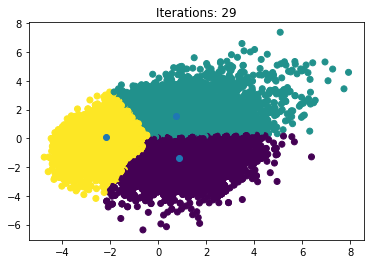

In [51]:
max_iterations = 100
k = 3

centroids = random_centroid(data, k)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_label(data, centroids)
    centroids = new_centroids(data, labels, k)
    plot_cluster(data, labels, centroids, iteration)
    
    iteration += 1

In [52]:
centroids

,0,1,2
overall,4.784633,5.806043,3.206838
potential,4.506962,6.497993,4.928473
value_eur,1.044980,1.285501,1.026614
wage_eur,1.118904,1.420001,1.028505
age,5.472247,3.596161,2.518708


In [54]:
players[labels==1][['short_name'] + features]

,short_name,overall,potential,value_eur,wage_eur,age
0,L. Messi,93,93,78000000.0,320000.0,34
1,R. Lewandowski,92,92,119500000.0,270000.0,32
2,Cristiano Ronaldo,91,91,45000000.0,270000.0,36
3,Neymar Jr,91,91,129000000.0,270000.0,29
4,K. De Bruyne,91,91,125500000.0,350000.0,30
...,...,...,...,...,...,...
13245,D. Scarlett,63,86,1500000.0,3000.0,17
13256,L. Bate,63,83,1300000.0,5000.0,18
13351,Llabrés,63,81,1200000.0,3000.0,19
14144,H. Mejbri,62,84,1300000.0,6000.0,18


In [55]:
# compare the algorithm with sklearn KMeans
from sklearn.cluster import KMeans

kmeans = KMeans(3)
kmeans.fit(data)

KMeans(n_clusters=3)

In [56]:
centroids = kmeans.cluster_centers_

In [58]:
pd.DataFrame(centroids, columns=features).T

,0,1,2
overall,6.219849,3.588800,4.804694
potential,6.620634,5.199946,4.509081
value_eur,1.411467,1.035418,1.040224
wage_eur,1.652459,1.039455,1.113588
age,4.126389,2.707428,5.606515
